In [31]:
import pandas as pd

# Extracting data from [US Environmental Protection Agency](https://aqs.epa.gov/aqsweb/airdata/download_files.html)

The following code downloads every single `.zip` file from the Annual Summary Data table, specifically the AQI by County column. Then the `.csv` files are extracted and concatenated into a single pandas dataframe. The resulting dataframe, `final_df` is converted into `combined_aqi_by_county.csv` and saved to drive.

Getting the file from Drive is faster than doing this entire process everytime a new runtime connection has to be made.

(Last run: May 7th, 2025)

```
import os
import zipfile
import shutil

# Create directories for zipped and extracted data if they don't exist
os.makedirs('/content/zipped', exist_ok=True)
os.makedirs('/content/extracted_data', exist_ok=True)

# Download all ZIP files for 2024 to 1980 into the 'zipped' folder
base_url = 'https://aqs.epa.gov/aqsweb/airdata/annual_aqi_by_county_{}.zip'

for year in range(2024, 1979, -1):  # Download files from 2024 to 1980
    zip_file_name = os.path.join('/content/zipped', f'annual_aqi_by_county_{year}.zip')  # Save as annual_aqi_by_county_YEAR.zip
    download_url = base_url.format(year)
    print(f"Downloading {download_url}...")
    !wget -O {zip_file_name} {download_url}

# Unzip each downloaded file into 'extracted_data'
for zip_file in os.listdir('/content/zipped'):
    zip_file_path = os.path.join('/content/zipped', zip_file)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('/content/extracted_data')

# Delete the 'zipped' folder and its contents after extraction
shutil.rmtree('/content/zipped')
shutil.rmtree('/content/sample_data')

# Verify extraction
!ls /content/extracted_data

# Initialize an empty list to hold individual DataFrames
df_list = []

# Read all CSV files from the extracted data and combine them into a single DataFrame
for file in os.listdir('/content/extracted_data'):
    if file.endswith('.csv'):  # Only process CSV files
        file_path = os.path.join('/content/extracted_data', file)
        print(f"Reading {file_path}...")
        df = pd.read_csv(file_path)  # Read each CSV file into a DataFrame
        df_list.append(df)  # Add the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)

# Display the first few rows of the combined DataFrame
final_df.head()

# Save the DataFrame to a CSV file
final_df.to_csv('/content/combined_aqi_by_county.csv', index=False)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path inside your Google Drive
output_path = '/content/drive/My Drive/Colab Notebooks/Datasets, spreadsheets, etc.'

# Create the folder if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Save the DataFrame to that path
final_df.to_csv(f'{output_path}/combined_aqi_by_county.csv', index=False)

## (Optional) Download the CSV file
# from google.colab import files
# files.download('/content/combined_aqi_by_county.csv')
```

# Getting the data

In [32]:
# Easy simple way of accessing my datasets

aqi_df_sharelink = 'https://drive.google.com/file/d/130DVMpCfi1dujuygMyI8bzoP1fvSONvO/view?usp=drive_link' # this is the link received when clicked the Share button in Google Drive
aqi_df = pd.read_csv('https://drive.google.com/uc?export=download&id='+aqi_df_sharelink.split('/d/')[1].split('/')[0]) # this parses the string from the line above to make a download link

aqi_df = aqi_df[aqi_df['State'] != 'Country Of Mexico'] # dropping Mexico from the analysis

aqi_df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2001,283,174,95,12,2,0,0,159,84,46,0,0,203,80,0
1,Alabama,Clay,2001,279,145,119,14,1,0,0,164,87,49,0,0,197,82,0
2,Alabama,Colbert,2001,100,36,64,0,0,0,0,90,78,55,0,0,0,100,0
3,Alabama,DeKalb,2001,365,198,136,28,3,0,0,164,97,47,0,0,292,73,0
4,Alabama,Elmore,2001,241,165,63,12,1,0,0,154,80,43,0,0,241,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41531,Wyoming,Laramie,1988,54,53,1,0,0,0,0,52,26,16,0,0,0,0,54
41532,Wyoming,Park,1988,51,39,12,0,0,0,0,98,61,28,0,0,0,0,51
41533,Wyoming,Sheridan,1988,278,206,70,2,0,0,0,115,62,38,0,0,0,0,278
41534,Wyoming,Sublette,1988,70,70,0,0,0,0,0,43,32,15,0,0,0,70,0


| **Column**                              | **Description**                                                                                                                                                                                    |
| --------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Days with AQI**                       | Total number of days in the year for which the Air Quality Index (AQI) was calculated.                                                                                                             |
| **Good Days**                           | Number of days the AQI was in the "Good" range (0–50), meaning air quality was satisfactory with little or no risk.                                                                                |
| **Moderate Days**                       | Number of days the AQI was in the "Moderate" range (51–100), which may pose a minor risk to a very small number of sensitive individuals.                                                          |
| **Unhealthy for Sensitive Groups Days** | Days when AQI was in the 101–150 range, where sensitive individuals (e.g., elderly, children, those with asthma) may experience health effects, but the general public is unlikely to be affected. |
| **Unhealthy Days**                      | Days with AQI in the 151–200 range. Everyone may begin to experience health effects, and members of sensitive groups may experience more serious effects.                                          |
| **Very Unhealthy Days**                 | Days with AQI between 201–300. Health alert: everyone may experience more serious health effects.                                                                                                  |
| **Hazardous Days**                      | Days with AQI above 300. Health warnings of emergency conditions: the entire population is more likely to be affected.                                                                             |
| **Max AQI**                             | The highest (worst) AQI value recorded for the county during the year.                                                                                                                             |
| **90th Percentile AQI**                 | The AQI value below which 90% of the daily AQI values fall. This gives an idea of how bad AQI gets on the worse days, without considering extremes.                                                |
| **Median AQI**                          | The middle AQI value for the year—half of the AQI values were above this, and half were below.                                                                                                     |
| **Days CO**                             | Number of days where carbon monoxide (CO) was the primary pollutant determining the AQI.                                                                                                           |
| **Days NO2**                            | Number of days where nitrogen dioxide (NO₂) was the primary pollutant determining the AQI.                                                                                                         |
| **Days Ozone**                          | Number of days where ground-level ozone was the dominant pollutant affecting the AQI.                                                                                                              |
| **Days PM2.5**                          | Number of days where fine particulate matter (PM2.5) was the primary pollutant.                                                                                                                    |
| **Days PM10**                           | Number of days where coarse particulate matter (PM10) was the primary pollutant.                                                                                                                   |


# Analyzing the data

In [33]:
aqi_df.groupby('State').apply(lambda x: (x['Hazardous Days'] > 0).sum(), include_groups=False) \
    .reset_index(name='Hazardous Days Count Above Threshold') \
    .sort_values(by='Hazardous Days Count Above Threshold', ascending=False) \
    .head(5)

,State,Hazardous Days Count Above Threshold
4,California,138
51,Washington,42
33,New Mexico,33
39,Oregon,32
2,Arizona,30


In [34]:
aqi_df.groupby('State').apply(lambda x: (x['Very Unhealthy Days'] > 0).sum(), include_groups=False) \
    .reset_index(name='Hazardous Days Count Above Threshold') \
    .sort_values(by='Hazardous Days Count Above Threshold', ascending=False) \
    .head(5)

,State,Hazardous Days Count Above Threshold
4,California,702
40,Pennsylvania,324
37,Ohio,296
32,New Jersey,276
46,Texas,261


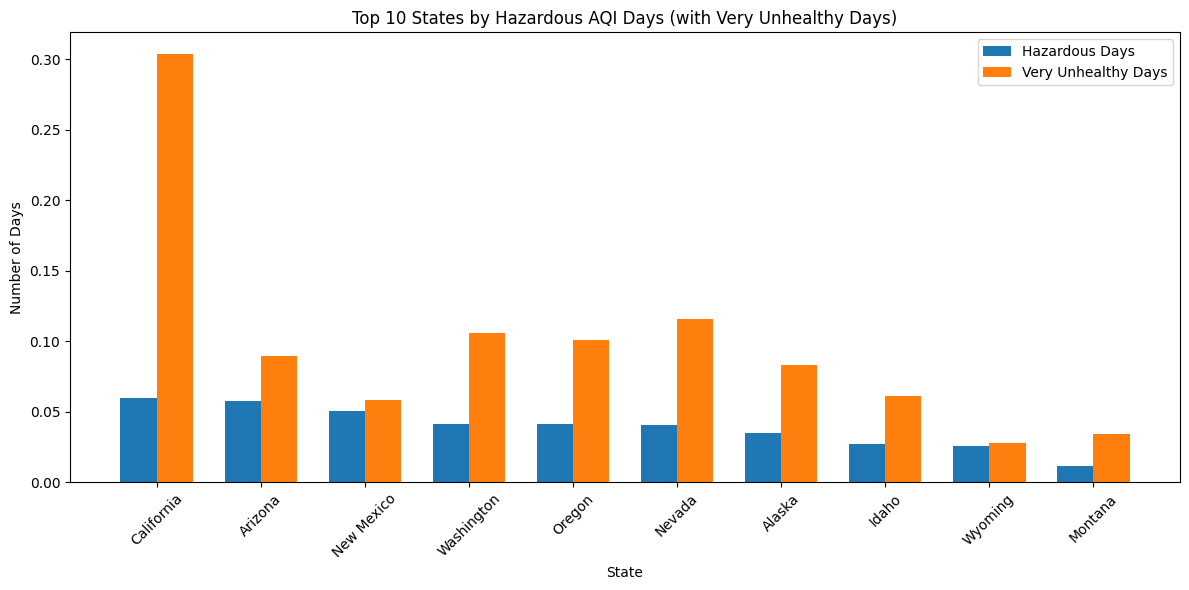

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate Hazardous and Very Unhealthy days per state
state_stats = aqi_df.groupby('State').apply(
    lambda x: pd.Series({
        'Hazardous Days Count': (x['Hazardous Days'] > 0).mean(),
        'Very Unhealthy Days Count': (x['Very Unhealthy Days'] > 0).mean()
    }),
    include_groups=False
).reset_index()

# Sort by Hazardous Days and select top 10
top10_by_hazardous = state_stats.sort_values(by='Hazardous Days Count', ascending=False).head(10)

# Plotting
x = top10_by_hazardous['State']
width = 0.35
x_indexes = range(len(x))

plt.figure(figsize=(12, 6))
plt.bar([i - width/2 for i in x_indexes], top10_by_hazardous['Hazardous Days Count'], width=width, label='Hazardous Days')
plt.bar([i + width/2 for i in x_indexes], top10_by_hazardous['Very Unhealthy Days Count'], width=width, label='Very Unhealthy Days')

plt.xlabel('State')
plt.ylabel('Number of Days')
plt.title('Top 10 States by Hazardous AQI Days (with Very Unhealthy Days)')
plt.xticks(ticks=x_indexes, labels=x, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

California has a lot more hazardous days than any other state.

In [36]:
days_per_aqi = aqi_df.copy()

for i in ['Good Days','Moderate Days','Unhealthy for Sensitive Groups Days','Unhealthy Days','Very Unhealthy Days','Hazardous Days']:
    days_per_aqi[i] = (days_per_aqi[i]/days_per_aqi['Days with AQI'])*100

days_per_aqi

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2001,283,61.484099,33.568905,4.240283,0.706714,0.0,0.0,159,84,46,0,0,203,80,0
1,Alabama,Clay,2001,279,51.971326,42.652330,5.017921,0.358423,0.0,0.0,164,87,49,0,0,197,82,0
2,Alabama,Colbert,2001,100,36.000000,64.000000,0.000000,0.000000,0.0,0.0,90,78,55,0,0,0,100,0
3,Alabama,DeKalb,2001,365,54.246575,37.260274,7.671233,0.821918,0.0,0.0,164,97,47,0,0,292,73,0
4,Alabama,Elmore,2001,241,68.464730,26.141079,4.979253,0.414938,0.0,0.0,154,80,43,0,0,241,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41531,Wyoming,Laramie,1988,54,98.148148,1.851852,0.000000,0.000000,0.0,0.0,52,26,16,0,0,0,0,54
41532,Wyoming,Park,1988,51,76.470588,23.529412,0.000000,0.000000,0.0,0.0,98,61,28,0,0,0,0,51
41533,Wyoming,Sheridan,1988,278,74.100719,25.179856,0.719424,0.000000,0.0,0.0,115,62,38,0,0,0,0,278
41534,Wyoming,Sublette,1988,70,100.000000,0.000000,0.000000,0.000000,0.0,0.0,43,32,15,0,0,0,70,0


In [37]:
nocounty_df = days_per_aqi.drop(columns=['County'])
grouped_year_state_df = nocounty_df.groupby(['Year', 'State']).mean().reset_index()
avg_byyear_bystate = grouped_year_state_df.drop(columns='State').groupby('Year').mean().reset_index()
avg_byyear_bystate.head()

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,1980,299.292102,67.181291,22.307250,6.940143,2.598289,0.972223,0.000805,178.511641,94.483729,41.751459,89.758457,45.396951,164.136694,0.0,0.000000
1,1981,300.273510,71.024512,22.129755,4.847572,1.502029,0.495033,0.001099,164.396693,80.406775,39.297182,92.743874,44.020457,163.509178,0.0,0.000000
2,1982,303.173787,71.568324,21.926228,4.497885,1.508645,0.497549,0.001370,167.127825,79.726026,39.590684,99.467069,40.090273,163.575483,0.0,0.040962
3,1983,304.236726,68.969287,21.836734,5.723686,2.484473,0.985272,0.000548,174.539412,92.852130,40.419898,94.223949,37.797278,171.223620,0.0,0.991879
4,1984,302.200240,71.581256,21.476880,4.945485,1.525068,0.471311,0.000000,162.721590,82.457430,38.981577,88.343071,43.704390,166.364649,0.0,3.788130


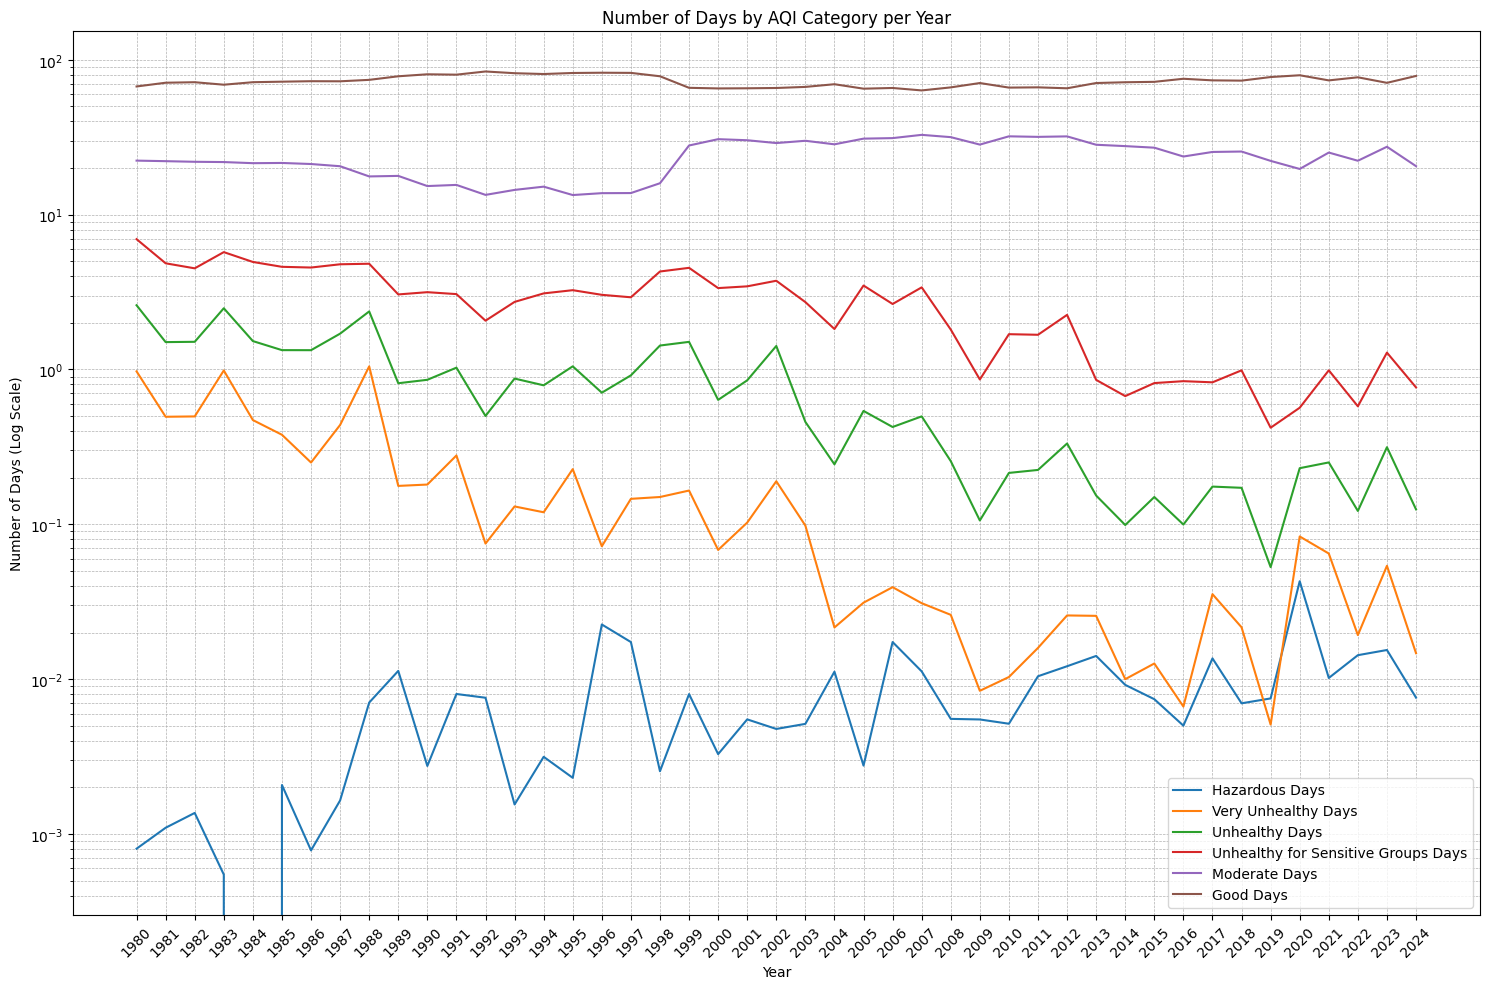

In [38]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(15, 10))

plt.plot(avg_byyear_bystate['Year'], avg_byyear_bystate['Hazardous Days'], label='Hazardous Days')
plt.plot(avg_byyear_bystate['Year'], avg_byyear_bystate['Very Unhealthy Days'], label='Very Unhealthy Days')
plt.plot(avg_byyear_bystate['Year'], avg_byyear_bystate['Unhealthy Days'], label='Unhealthy Days')
plt.plot(avg_byyear_bystate['Year'], avg_byyear_bystate['Unhealthy for Sensitive Groups Days'], label='Unhealthy for Sensitive Groups Days')
plt.plot(avg_byyear_bystate['Year'], avg_byyear_bystate['Moderate Days'], label='Moderate Days')
plt.plot(avg_byyear_bystate['Year'], avg_byyear_bystate['Good Days'], label='Good Days')

plt.yscale('log')  # for better visualization
plt.xlabel('Year')
plt.ylabel('Number of Days (Log Scale)')
plt.title('Number of Days by AQI Category per Year')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(avg_byyear_bystate['Year'], rotation=45)
plt.tight_layout()
plt.show()